## Análise de dados dos filmes exibidos no Brasil 

In [20]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from datetime import datetime
import seaborn as sns
import os
import geopandas as gpd

In [21]:
# Pasta dos arquivos
pasta = '/Users/bentofh/Documents/GitHub/ancine/Bilheteria/'

In [22]:
# Lista para armazenar os dataframes
dataframes = []

# Range de análise 
ano_min_analise = 2014
ano_max_analise = 2024

# Itera sobre os arquivos na pasta
for ano in range(ano_min_analise, ano_max_analise):
    arquivo = os.path.join(pasta, f'BilheteriaObrasDia_{ano}.parquet')
    df = pd.read_parquet(arquivo)
    dataframes.append(df)

# Combina todos os dataframes em um único
df_total = pd.concat(dataframes, ignore_index=True)

df_total.head(5)

,DT_EXIBICAO,CPB_ROE,TITULO_ORIGINAL,TITULO_BRASILEIRO,PAIS,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_COMPLEXO,REGISTRO_SALA,UF_COMPLEXO,MUNICIPIO_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA,PUBLICO,NOME_SALA
0,04/12/2014,E1402380500000,ISLAND OF LEMURS: MADAGASCAR 3D,ILHA DOS LÊMURES: MADAGASCAR - 3D,"Canadá, Estados Unidos, Madagascar",6000018.0,22379.0,5003544.0,RS,PORTO ALEGRE,CINEARTE POMPEIA LTDA,08.658.141/0001-08,2,WALLIG IMAX
1,24/10/2014,E1402380500000,ISLAND OF LEMURS: MADAGASCAR 3D,ILHA DOS LÊMURES: MADAGASCAR - 3D,"Canadá, Estados Unidos, Madagascar",6000018.0,19775.0,5003273.0,SP,COTIA,CINEARTE POMPEIA LTDA,08.658.141/0001-08,0,CINESPAÇO GRANJA VIANNA SALA 7 IMAX
2,30/10/2014,E1402380500000,ISLAND OF LEMURS: MADAGASCAR 3D,ILHA DOS LÊMURES: MADAGASCAR - 3D,"Canadá, Estados Unidos, Madagascar",6000018.0,19775.0,5003273.0,SP,COTIA,CINEARTE POMPEIA LTDA,08.658.141/0001-08,1,CINESPAÇO GRANJA VIANNA SALA 7 IMAX
3,23/10/2014,E1402380500000,ISLAND OF LEMURS: MADAGASCAR 3D,ILHA DOS LÊMURES: MADAGASCAR - 3D,"Canadá, Estados Unidos, Madagascar",6000018.0,22379.0,5004285.0,RS,PORTO ALEGRE,CINEARTE POMPEIA LTDA,08.658.141/0001-08,1,CINESPAÇO WALLIG IMAX
4,29/10/2014,E1402380500000,ISLAND OF LEMURS: MADAGASCAR 3D,ILHA DOS LÊMURES: MADAGASCAR - 3D,"Canadá, Estados Unidos, Madagascar",6000018.0,19775.0,5003273.0,SP,COTIA,CINEARTE POMPEIA LTDA,08.658.141/0001-08,0,CINESPAÇO GRANJA VIANNA SALA 7 IMAX


In [23]:
# Gerando uma amostra aleatória
df = df_total.sample(n=1000000)

# Liberando o uso do df_total
del df_total 

# Selecionar apenas as colunas desejadas
colunas_selecionadas = ['DT_EXIBICAO', 'TITULO_ORIGINAL', 'TITULO_BRASILEIRO', 'PAIS', 'UF_COMPLEXO', 'MUNICIPIO_COMPLEXO', 'RAZAO_SOCIAL_DISTRIBUIDORA', 'PUBLICO']
df = df[colunas_selecionadas]

# Convertendo 'DT_EXIBICAO' para o formato de data
df['DT_EXIBICAO'] = pd.to_datetime(df['DT_EXIBICAO'], format='%d/%m/%Y')

# Caso necessite do arquivo
# df.to_parquet(os.path.join(pasta,r'BrilheteriaAmostra.parquet'))
# df.to_csv(os.path.join(pasta,r'BrilheteriaAmostra.csv'), index=False)

In [24]:
# Importando arquivo
df = pd.read_parquet(os.path.join(pasta,r'BrilheteriaAmostra.parquet'))
df.shape

(1000000, 8)

In [25]:
# Configurando as cores personalizadas
paleta = {
    'roxo'      : '#918EAD',
    'verde'     : '#007573',
    'azul'      : '#8CB9C5',
    'navy'      : '#374375',
    'laranja1'  : '#FDA074',
    'laranja2'  : '#F36400',
    'amarelo'   : '#F9C770',
    'marrom'    : '#895159'
}

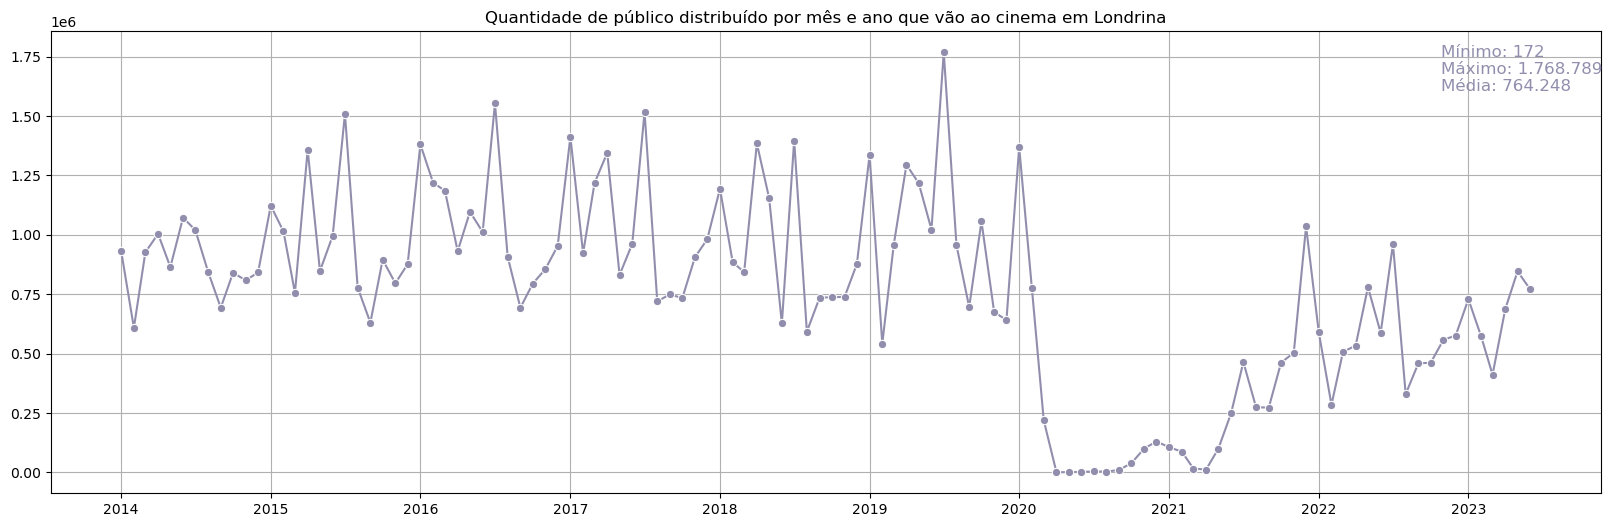

In [6]:
# Agrupar por ano e mês e somar o público
df_agrupado = df.groupby(df['DT_EXIBICAO'].dt.to_period("M"))['PUBLICO'].sum()
df_agrupado = df_agrupado.reset_index()
df_agrupado['DT_EXIBICAO'] = df_agrupado['DT_EXIBICAO'].dt.to_timestamp()

# Encontrar os valores mínimo, máximo e média
minimo = df_agrupado['PUBLICO'].min()
maximo = df_agrupado['PUBLICO'].max()
media = df_agrupado['PUBLICO'].mean()

# Criar o gráfico
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_agrupado, x='DT_EXIBICAO', y='PUBLICO', marker='o', color=paleta['roxo'])

# Configurações adicionais do gráfico
plt.title('Quantidade de público distribuído por mês e ano que vão ao cinema em Londrina')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(True)

# Texto informativo fora do gráfico
texto_informativo = f'Mínimo: {minimo:,}'.replace(',', '.') + '\n' + \
                    f'Máximo: {maximo:,}'.replace(',', '.') + '\n' + \
                    f'Média: {media:,.0f}'.replace(',', '.')
plt.figtext(0.82, 0.78, texto_informativo, ha='left', fontsize=12, color=paleta['roxo'])

# Exibindo o gráfico
plt.show()


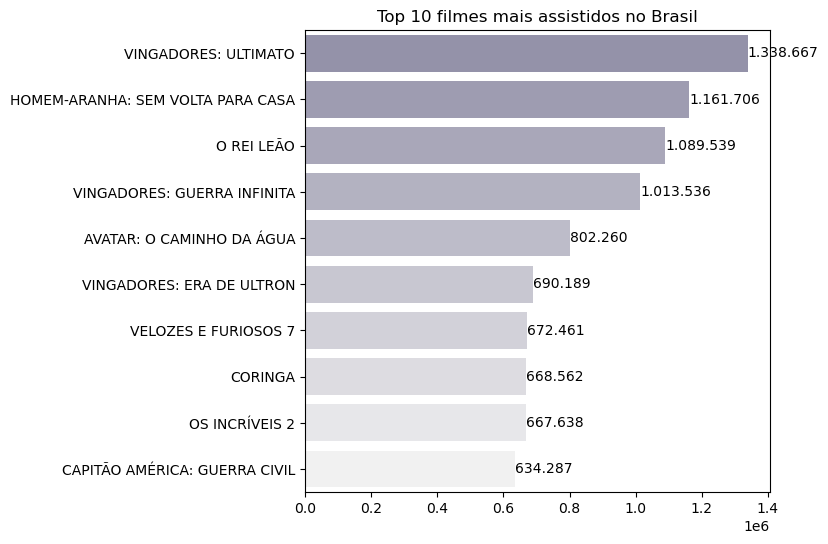

In [7]:
# Agrupar por título brasileiro e somar o público
top_films = df.groupby('TITULO_BRASILEIRO')['PUBLICO'].sum().sort_values(ascending=False).head(10)

# Gerando paletas de cores de acordo com uma cor base
cor_base = paleta['roxo']

# Gerando 10 tons diferentes da cor fornecida
tons = sns.light_palette(cor_base, n_colors=10, reverse=True)

# Convertendo as cores para formato hexadecimal
tons_degrade = [mcolors.to_hex(c) for c in tons]

# Definindo a paleta de cores
colors = tons_degrade

# Criando o gráfico de barras horizontais
plt.figure(figsize=(6, 6))
barplot = sns.barplot(y=top_films.index, x=top_films.values, palette=tons_degrade)

# Configurações adicionais do gráfico
plt.title('Top 10 filmes mais assistidos no Brasil')
plt.xlabel('')
plt.ylabel('')
plt.grid(False, axis='x')

# Adicionando a soma da audiência em frente às barras
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 3,  # posição x
             p.get_y() + p.get_height() / 2,  # posição y
             f'{width:,.0f}'.replace(',', '.'),  # valor
             ha='left', 
             va='center')

# Exibindo o gráfico
plt.show()

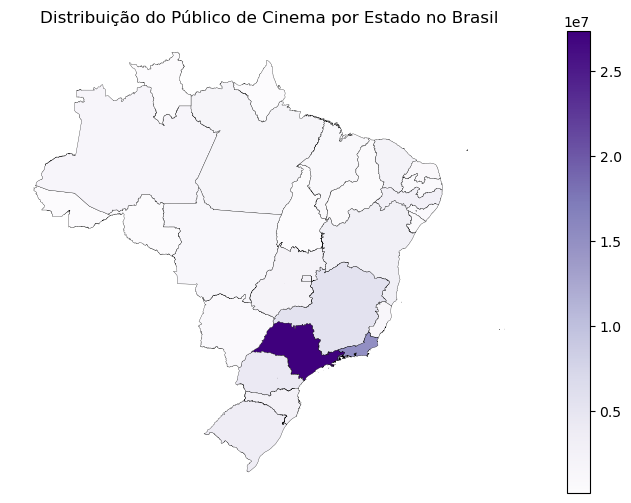

In [8]:
# Agrupar os dados por estado e somar o público
df_publico_por_estado = df.groupby('UF_COMPLEXO')['PUBLICO'].sum().reset_index()

# Carregar o shapefile do Brasil (você precisará de um shapefile do Brasil)
shapefile_path = '/Users/bentofh/Documents/GitHub/ancine/BR_UF_2022/BR_UF_2022.shp'
brasil_map = gpd.read_file(shapefile_path)

# Juntar os dados de público com o shapefile
mapa_final = brasil_map.set_index('SIGLA_UF').join(df_publico_por_estado.set_index('UF_COMPLEXO'))

# Criar o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
mapa_final.plot(column='PUBLICO', ax=ax, legend=True, cmap='Purples', 
                edgecolor='black', linewidth=0.2) 

# Adicionando títulos e labels
plt.title('Distribuição do Público de Cinema por Estado no Brasil')
ax.set_axis_off()

# Mostrar o gráfico
plt.show()

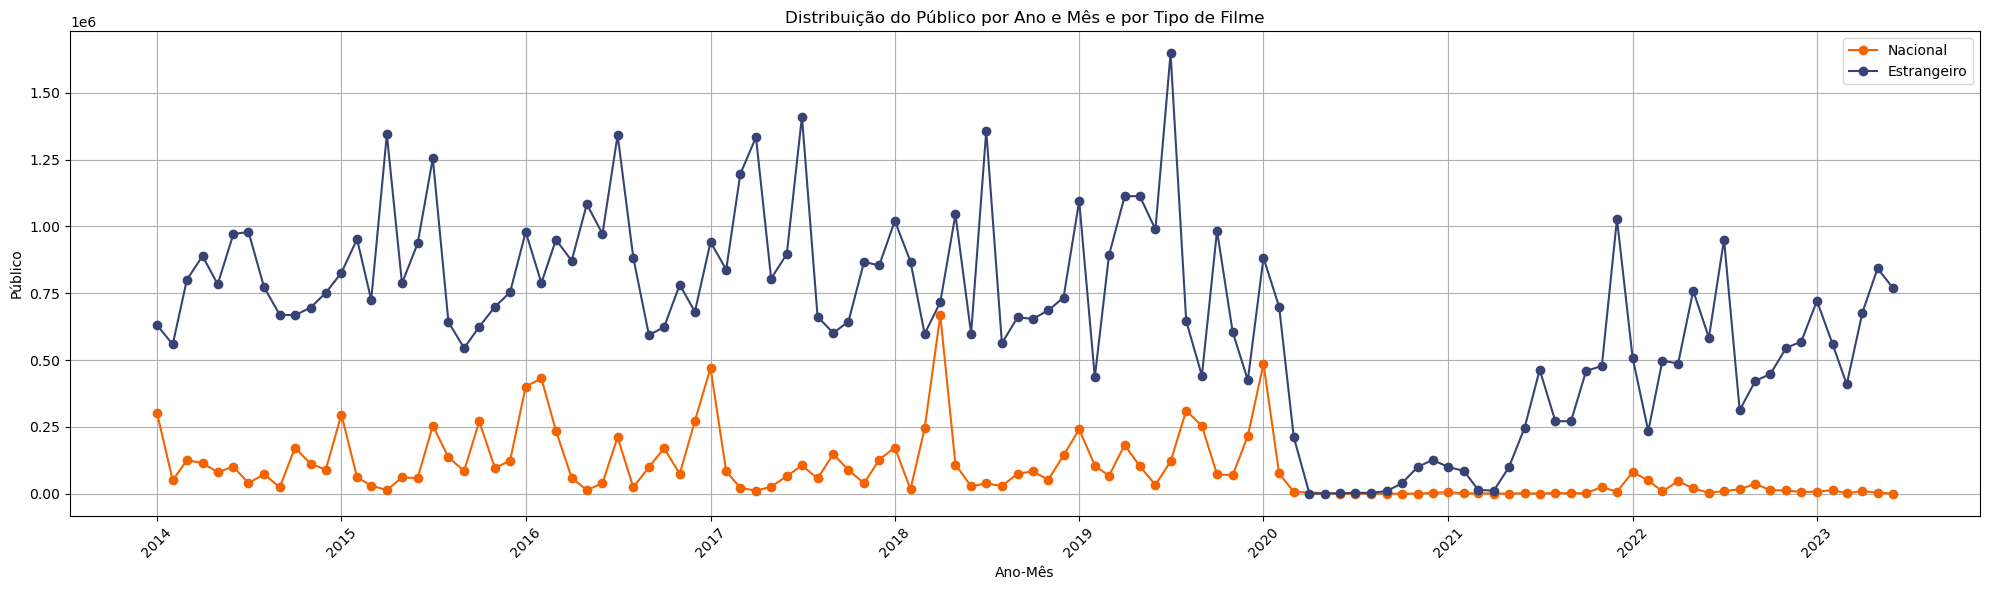

In [9]:
# Converter DT_EXIBICAO para datetime e extrair o ano e mês
df['DT_EXIBICAO'] = pd.to_datetime(df['DT_EXIBICAO'])
df['ANO_MES'] = df['DT_EXIBICAO'].dt.to_period('M')

# Classificar filmes como Nacional ou Estrangeiro
df['TIPO_FILME'] = df['PAIS'].str.upper().apply(lambda x: 'Nacional' if x is not None and 'BRASIL' in x else 'Estrangeiro')

# Agrupar por ano e mês, somando o público
publico_temporal = df.groupby(['ANO_MES', 'TIPO_FILME']).agg({'PUBLICO':'sum'}).reset_index()

# Cores para os tipos de filmes
cores = {'Nacional': paleta['laranja2'], 'Estrangeiro': paleta['navy']}

# Plotar o gráfico
plt.figure(figsize=(20, 6))
for tipo, cor in cores.items():
    subset = publico_temporal[publico_temporal['TIPO_FILME'] == tipo]
    plt.plot(subset['ANO_MES'].dt.to_timestamp(), subset['PUBLICO'], label=tipo, color=cor, marker='o')

plt.title('Distribuição do Público por Ano e Mês e por Tipo de Filme')
plt.xlabel('Ano-Mês')
plt.ylabel('Público')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

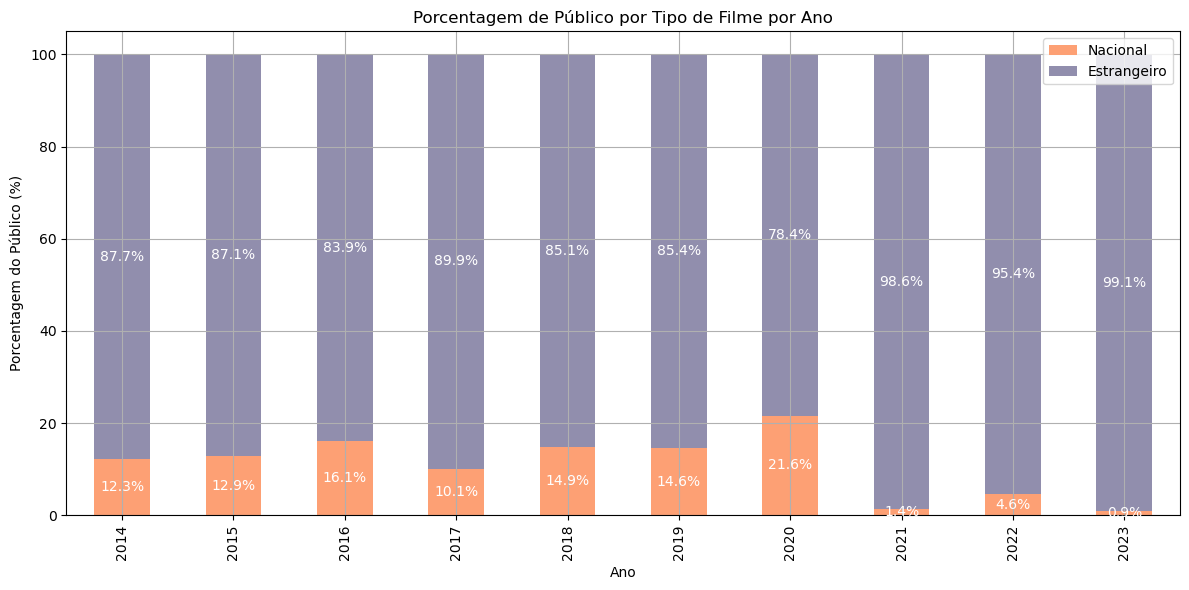

In [15]:
# Converter DT_EXIBICAO para datetime e extrair o ano
df['DT_EXIBICAO'] = pd.to_datetime(df['DT_EXIBICAO'])
df['ANO'] = df['DT_EXIBICAO'].dt.year

# Classificar filmes como Nacional ou Estrangeiro
df['TIPO_FILME'] = df['PAIS'].str.upper().apply(lambda x: 'Nacional' if x is not None and 'BRASIL' in x else 'Estrangeiro')

# Agrupar por ano e tipo de filme, somando o público
publico_por_ano = df.groupby(['ANO', 'TIPO_FILME'])['PUBLICO'].sum().reset_index()

# Pivotear os dados para obter a soma do público por tipo de filme em cada ano
pivot_publico = publico_por_ano.pivot(index='ANO', columns='TIPO_FILME', values='PUBLICO').fillna(0)

# Calcular o total do público por ano
pivot_publico['Total'] = pivot_publico.sum(axis=1)

# Calcular a porcentagem para cada tipo de filme por ano
pivot_publico['Nacional_%'] = (pivot_publico['Nacional'] / pivot_publico['Total']) * 100
pivot_publico['Estrangeiro_%'] = (pivot_publico['Estrangeiro'] / pivot_publico['Total']) * 100

# Cores para os tipos de filmes nas barras
cores_barras = {'Nacional_%': paleta['laranja1'], 'Estrangeiro_%': paleta['roxo']}

# Cor das anotações
cor_anotacao = 'white'

# Plotar o gráfico de barras empilhadas
ax = pivot_publico[['Nacional_%', 'Estrangeiro_%']].plot(kind='bar', stacked=True, figsize=(12, 6), color=[cores_barras['Nacional_%'], cores_barras['Estrangeiro_%']])

plt.title('Porcentagem de Público por Tipo de Filme por Ano')
plt.xlabel('Ano')
plt.ylabel('Porcentagem do Público (%)')

# Adicionando anotações de porcentagem
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: # Verifica se a barra tem altura para evitar etiquetas em barras vazias
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}%'.format(height), 
                ha='center', 
                va='center', 
                color=cor_anotacao)

plt.legend(['Nacional', 'Estrangeiro'])
plt.grid(True)
plt.tight_layout()
plt.show()


### No notebook 3 realizado uma consulta no site IMDB para buscar as informações sobre gênero dos filmes que estamos tratando aqui.

In [16]:
# Caminhos dos arquivos Parquet
pasta_imdb = '/Users/bentofh/Documents/GitHub/ancine/IMDB'
caminho_arquivo_imdb = os.path.join(pasta_imdb, 'imdb.parquet')
df_imdb = pd.read_parquet(caminho_arquivo_imdb)

# Converter os títulos para maiúsculas
df['TITULO_ORIGINAL'] = df['TITULO_ORIGINAL'].str.upper()
df_imdb['originalTitle'] = df_imdb['originalTitle'].str.upper()

# Realizar o join
df = df.merge(df_imdb[['originalTitle', 'genres']], left_on='TITULO_ORIGINAL', right_on='originalTitle', how='left')

# Renomear a coluna 'genres' para 'GENERO_FILME' e remover a coluna 'originalTitle' redundante
df.rename(columns={'genres': 'GENERO_FILME'}, inplace=True)
df.drop(columns=['originalTitle'], inplace=True)

# Mostrar as primeiras linhas do DataFrame atualizado
df.head(5)

# Aqui nesse ponto alguns vários filmes ficaram sem gênero somente porque a descrição do mesmo não é exatamente a mesma nas duas base. 
# Até tentei aplicar um fuzzy aqui nesse ponto, mas foi demais pra minha RAM =)
# Tentarei aplicar o método em outro projeto dedicado a análises mais textuais.

,DT_EXIBICAO,TITULO_ORIGINAL,TITULO_BRASILEIRO,PAIS,UF_COMPLEXO,MUNICIPIO_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA,PUBLICO,ANO_MES,TIPO_FILME,ANO,GENERO_FILME
0,2016-10-02,AQUARIUS,None,"Brasil, França",MA,SÃO LUÍS,VITRINE FILMES LTDA,22,2016-10,Nacional,2016,Fantasy
1,2016-10-02,AQUARIUS,None,"Brasil, França",MA,SÃO LUÍS,VITRINE FILMES LTDA,22,2016-10,Nacional,2016,Comedy
2,2016-10-02,AQUARIUS,None,"Brasil, França",MA,SÃO LUÍS,VITRINE FILMES LTDA,22,2016-10,Nacional,2016,Documentary
3,2016-10-02,AQUARIUS,None,"Brasil, França",MA,SÃO LUÍS,VITRINE FILMES LTDA,22,2016-10,Nacional,2016,Fantasy
4,2016-10-02,AQUARIUS,None,"Brasil, França",MA,SÃO LUÍS,VITRINE FILMES LTDA,22,2016-10,Nacional,2016,Comedy


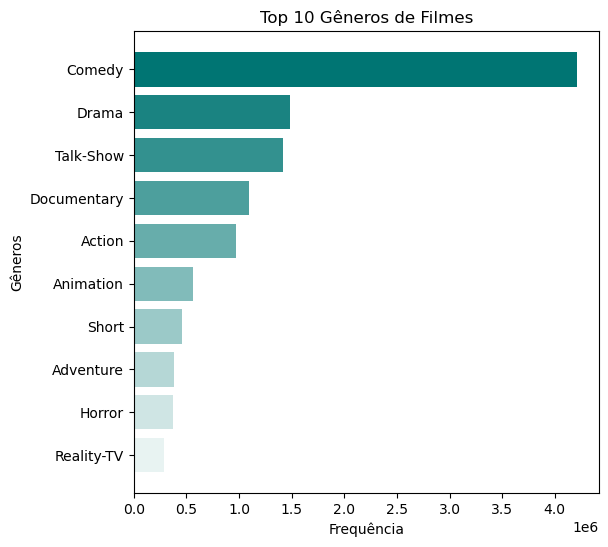

In [18]:
# Contar a frequência de cada gênero e pegar o top 10
contagem_generos_top10 = df['GENERO_FILME'].value_counts().head(10)

# Gerando paletas de cores de acordo com uma cor base
cor_base = paleta['verde']
tons = sns.light_palette(cor_base, n_colors=10, reverse=True)
tons_degrade = [mcolors.to_hex(c) for c in tons]
cores = tons_degrade

# Plotar um gráfico de barras horizontal
plt.figure(figsize=(6, 6))
barras = plt.barh(contagem_generos_top10.index, contagem_generos_top10.values, color=cores)
plt.title('Top 10 Gêneros de Filmes')
plt.xlabel('Frequência')
plt.ylabel('Gêneros')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior valor aparecer no topo
plt.show()

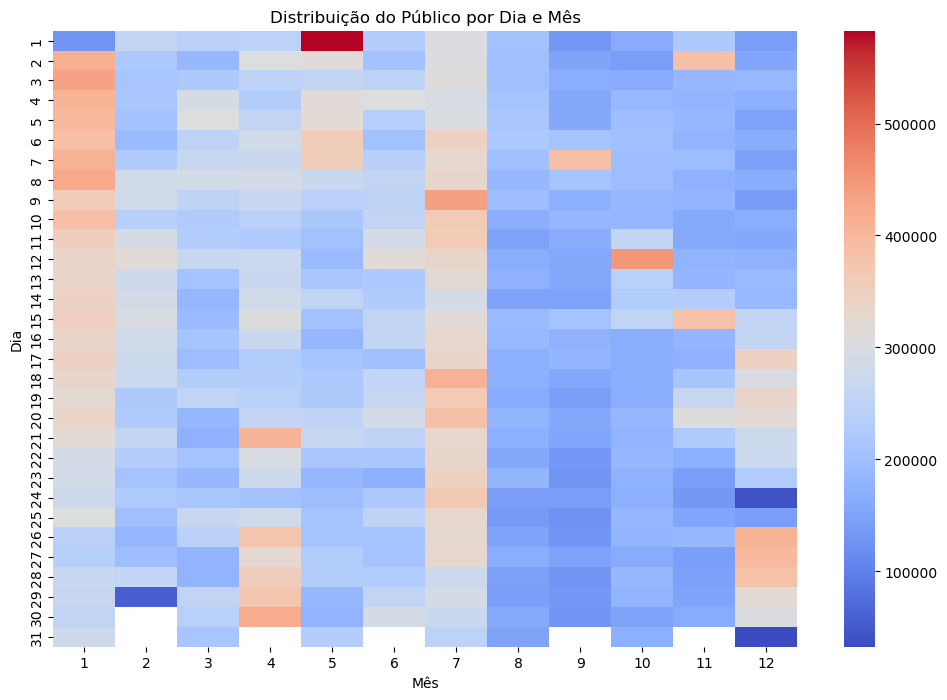

In [27]:
# Converter 'DT_EXIBICAO' para datetime
df['DT_EXIBICAO'] = pd.to_datetime(df['DT_EXIBICAO'])

# Extrair dia e mês
df['Dia'] = df['DT_EXIBICAO'].dt.day
df['Mes'] = df['DT_EXIBICAO'].dt.month

# Agrupar por dia e mês, somando o público
agrupamento = df.groupby(['Dia', 'Mes'])['PUBLICO'].sum().reset_index()

# Criar DataFrame pivot
pivot_df = agrupamento.pivot(index='Dia', columns='Mes', values='PUBLICO')

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=False, cmap='coolwarm')  # Altere 'coolwarm' para o mapa de cores de sua preferência
plt.title('Distribuição do Público por Dia e Mês')
plt.xlabel('Mês')
plt.ylabel('Dia')
plt.show()

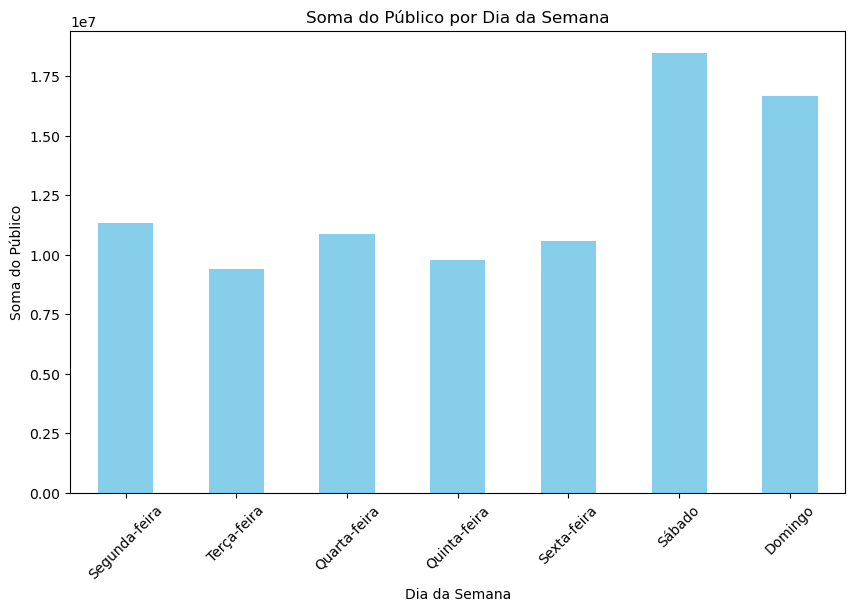

In [28]:
# Converter 'DT_EXIBICAO' para datetime
df['DT_EXIBICAO'] = pd.to_datetime(df['DT_EXIBICAO'])

# Converter datas em dias da semana (o resultado é um número de 0 a 6, onde 0 é segunda-feira)
df['Dia_da_Semana'] = df['DT_EXIBICAO'].dt.dayofweek

# Mapear os números para os nomes dos dias
dias = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 
        4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}
df['Dia_da_Semana'] = df['Dia_da_Semana'].map(dias)

# Agrupar por dia da semana e somar o público
soma_publico = df.groupby('Dia_da_Semana')['PUBLICO'].sum()

# Ordem dos dias para o gráfico
ordem_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
soma_publico = soma_publico.reindex(ordem_dias)

# Plotar o histograma
plt.figure(figsize=(10, 6))
soma_publico.plot(kind='bar', color='skyblue')  # Altere 'skyblue' para a cor de sua preferência
plt.title('Soma do Público por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Soma do Público')
plt.xticks(rotation=45)
plt.show()

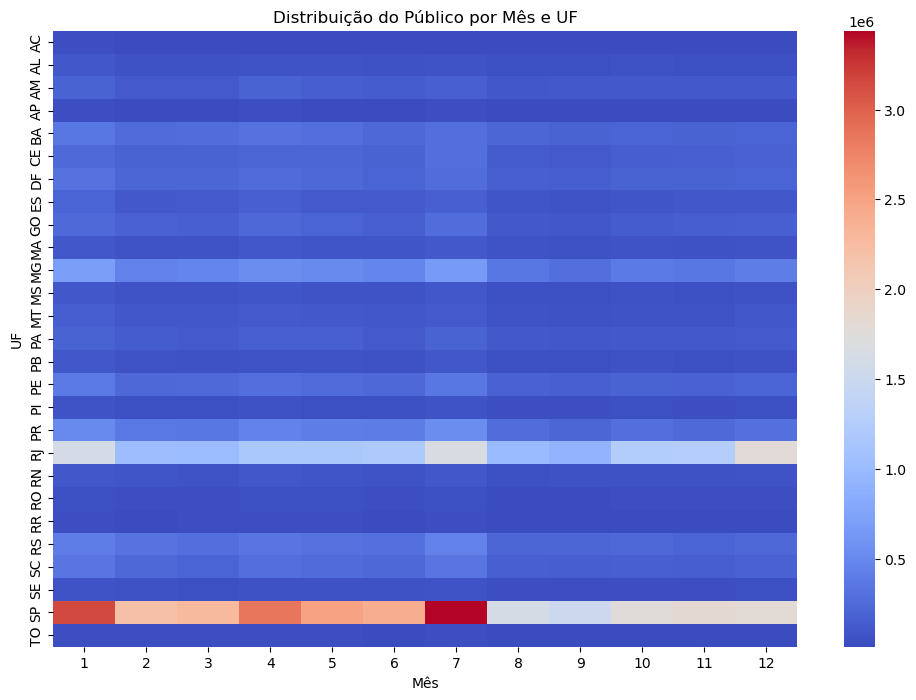

In [34]:
# Converter 'DT_EXIBICAO' para datetime e extrair o mês
df['DT_EXIBICAO'] = pd.to_datetime(df['DT_EXIBICAO'])
df['Mes'] = df['DT_EXIBICAO'].dt.month

# Agrupar por mês e UF, somando o público
agrupamento = df.groupby(['UF_COMPLEXO', 'Mes'])['PUBLICO'].sum().reset_index()

# Criar DataFrame pivot
pivot_df = agrupamento.pivot(index='UF_COMPLEXO', columns='Mes', values='PUBLICO')

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=False, cmap='coolwarm')  # Altere 'coolwarm' para o mapa de cores de sua preferência
plt.title('Distribuição do Público por Mês e UF')
plt.xlabel('Mês')
plt.ylabel('UF')
plt.show()
